In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, equilibrium
import pycalphad.variables as v

db = Database('Fe-C_Fei_Brosh_2014_09.TDB')

In [2]:
%time data = equilibrium(db, ['FE', 'C', 'VA'], 'FCC_A1', {v.X('C'): 1e-6, v.T: 600, v.P: np.logspace(5, 10, num=10)})

Components: C FE VA
Phases: FCC_A1 [done]
Computing initial grid [26 points, 19.1KB]
Computing convex hull [iteration 1]
progress 10.293877753139967
Refining convex hull
Rebuilding grid [28 points, 20.5KB]
Computing convex hull [iteration 2]
progress 1.7412760960489606
Refining convex hull
Rebuilding grid [30 points, 22.0KB]
Computing convex hull [iteration 3]
progress 1.0938666572971796
Refining convex hull
Rebuilding grid [32 points, 23.4KB]
Computing convex hull [iteration 4]
progress 1.0732033129854779
Refining convex hull
Rebuilding grid [34 points, 24.9KB]
Computing convex hull [iteration 5]
progress 3.411415930747196
Refining convex hull
Rebuilding grid [36 points, 26.3KB]
Computing convex hull [iteration 6]
progress 1.0100188738907263
Refining convex hull
Rebuilding grid [38 points, 27.8KB]
Computing convex hull [iteration 7]
progress 1.0036902239956231
Refining convex hull
Rebuilding grid [40 points, 29.2KB]
Computing convex hull [iteration 8]
progress 1.0013581234428581
Refin

In [3]:
data

<xray.Dataset>
Dimensions:       (P: 10, T: 1, X_C: 1, component: 2, internal_dof: 3, vertex: 2)
Coordinates:
  * P             (P) float64 1e+05 3.594e+05 1.292e+06 4.642e+06 1.668e+07 ...
  * T             (T) float64 600.0
  * X_C           (X_C) float64 1e-06
  * vertex        (vertex) int64 0 1
  * component     (component) object 'C' 'FE'
  * internal_dof  (internal_dof) int64 0 1 2
Data variables:
    MU            (P, T, X_C, component) float64 -4.069e+04 -1.669e+04 ...
    NP            (P, T, X_C, vertex) float64 0.3219 0.6781 0.8115 0.1885 ...
    GM            (P, T, X_C) float64 -1.669e+04 -1.669e+04 -1.668e+04 ...
    X             (P, T, X_C, vertex, component) float64 1.001e-06 1.0 ...
    Y             (P, T, X_C, vertex, internal_dof) float64 1.0 1.001e-06 ...
    Phase         (P, T, X_C, vertex) object 'FCC_A1' 'FCC_A1' 'FCC_A1' ...
Attributes:
    iterations: 26

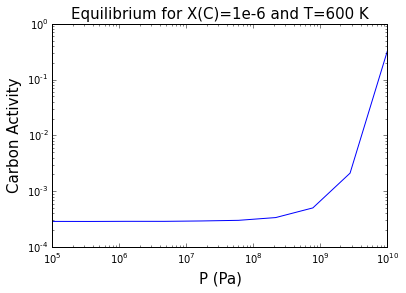

In [4]:
fig = plt.gca()
fig.plot(data['P'], np.exp(data['MU'].sel(T=600, X_C=1e-6, component='C')/(8.3145*600)))
fig.set_title('Equilibrium for X(C)=1e-6 and T=600 K', fontsize=15)
fig.set_xlabel('P (Pa)', fontsize=15)
fig.set_ylabel('Carbon Activity', fontsize=15)
fig.set_yscale('log')
fig.set_xscale('log')

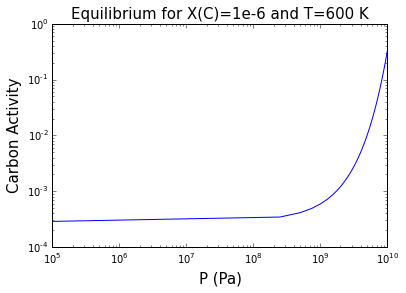

In [5]:
from_tc = np.array([
   [1.00000E+05, 2.87082E-04],
   [2.50098E+08, 3.43702E-04],
   [5.00095E+08, 4.11376E-04],
   [7.50092E+08, 4.92240E-04],
   [1.00009E+09, 5.88842E-04],
   [1.25009E+09, 7.04217E-04],
   [1.50008E+09, 8.41978E-04],
   [1.75008E+09, 1.00643E-03],
   [2.00008E+09, 1.20270E-03],
   [2.25008E+09, 1.43688E-03],
   [2.50008E+09, 1.71624E-03],
   [2.75007E+09, 2.04941E-03],
   [3.00007E+09, 2.44668E-03],
   [3.25007E+09, 2.92025E-03],
   [3.50006E+09, 3.48467E-03],
   [3.75006E+09, 4.15723E-03],
   [4.00006E+09, 4.95845E-03],
   [4.25006E+09, 5.91275E-03],
   [4.50006E+09, 7.04914E-03],
   [4.75005E+09, 8.40209E-03],
   [5.00005E+09, 1.00125E-02],
   [5.25005E+09, 1.19290E-02],
   [5.50004E+09, 1.42094E-02],
   [5.75004E+09, 1.69221E-02],
   [6.00004E+09, 2.01484E-02],
   [6.25004E+09, 2.39849E-02],
   [6.50004E+09, 2.85461E-02],
   [6.75003E+09, 3.39678E-02],
   [7.00003E+09, 4.04112E-02],
   [7.25003E+09, 4.80674E-02],
   [7.50002E+09, 5.71628E-02],
   [7.75002E+09, 6.79661E-02],
   [8.00002E+09, 8.07956E-02],
   [8.25002E+09, 9.60286E-02],
   [8.50002E+09, 1.14112E-01],
   [8.75001E+09, 1.35576E-01],
   [9.00001E+09, 1.61047E-01],
   [9.25001E+09, 1.91268E-01],
   [9.50000E+09, 2.27120E-01],
   [9.75000E+09, 2.69643E-01],
   [1.00000E+10, 3.20071E-01]
    ])
fig = plt.gca()
fig.plot(from_tc[:, 0], from_tc[:, 1])
fig.set_title('Equilibrium for X(C)=1e-6 and T=600 K', fontsize=15)
fig.set_xlabel('P (Pa)', fontsize=15)
fig.set_ylabel('Carbon Activity', fontsize=15)
fig.set_yscale('log')
fig.set_xscale('log')